In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'cluster.csv')
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
for i in data[['MINIMUM_PAYMENTS','CREDIT_LIMIT']]:
        data[i]=data[i].fillna(value=data[i].mean())

In [5]:
data.drop('CUST_ID',axis=1,inplace=True)

In [6]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.039353,0.000787,0.091790,0.000000,0.09179,0.000000,0.000160,0.000000,0.00008,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.00000,0.011546
1,0.293876,0.000083,0.000000,0.000000,0.00000,0.591240,0.000000,0.000000,0.00000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.00002,0.001101
2,0.310798,0.000125,0.096307,0.096307,0.00000,0.000000,0.000125,0.000125,0.00000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.00000,0.001495
3,0.207829,0.000079,0.186921,0.186921,0.00000,0.025661,0.000010,0.000010,0.00000,0.000010,0.000125,0.000125,0.935229,0.000000,0.107764,0.00000,0.001496
4,0.504284,0.000617,0.009867,0.009867,0.00000,0.000000,0.000051,0.000051,0.00000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.00000,0.007400


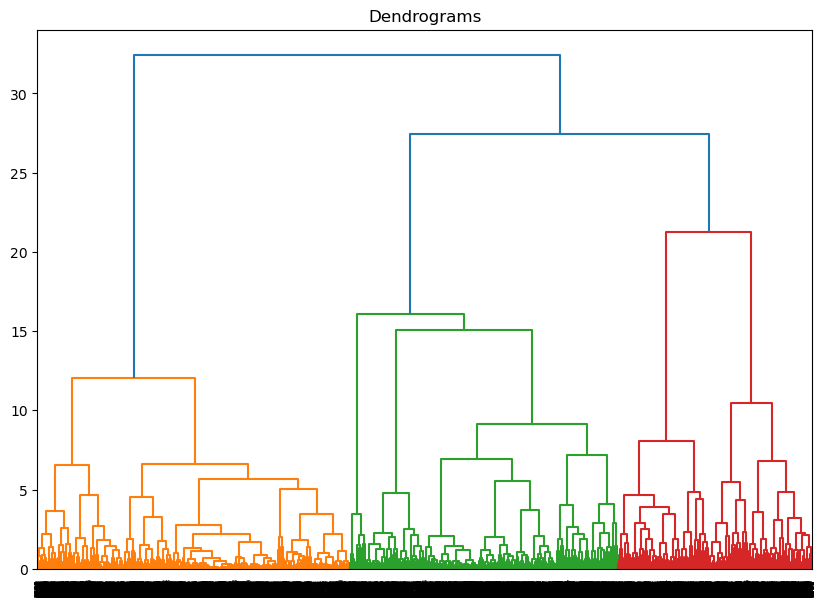

In [7]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

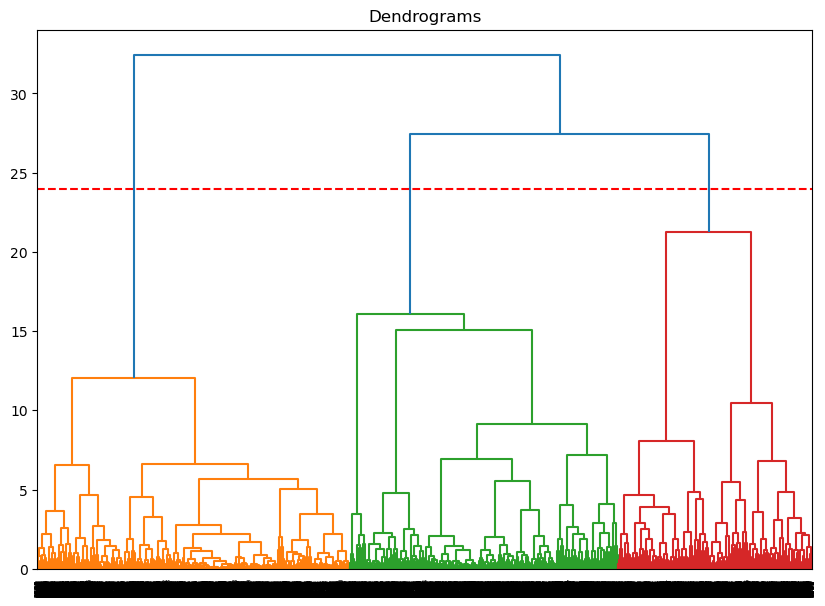

In [8]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=24, color='r', linestyle='--')

In [9]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y = cluster.fit_predict(data_scaled)
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [10]:
data['dependent_value'] = y
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,dependent_value
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [11]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,dependent_value
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318,1.095531
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331,0.766615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,0.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000,1.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000,2.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,2.000000


In [12]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dependent_value                     0
dtype: int64

In [13]:
data.corr()['dependent_value']

BALANCE                             0.304060
BALANCE_FREQUENCY                   0.116103
PURCHASES                          -0.295956
ONEOFF_PURCHASES                   -0.250367
INSTALLMENTS_PURCHASES             -0.239794
CASH_ADVANCE                        0.029248
PURCHASES_FREQUENCY                -0.257156
ONEOFF_PURCHASES_FREQUENCY         -0.236608
PURCHASES_INSTALLMENTS_FREQUENCY   -0.196103
CASH_ADVANCE_FREQUENCY              0.175289
CASH_ADVANCE_TRX                    0.076062
PURCHASES_TRX                      -0.253989
CREDIT_LIMIT                        0.017229
PAYMENTS                           -0.356087
MINIMUM_PAYMENTS                    0.182487
PRC_FULL_PAYMENT                   -0.283278
TENURE                             -0.043817
dependent_value                     1.000000
Name: dependent_value, dtype: float64

In [14]:
data.drop(['CASH_ADVANCE','CASH_ADVANCE_TRX','CREDIT_LIMIT','TENURE'],axis=1,inplace=True)

In [15]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'dependent_value'],
      dtype='object')

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data[['BALANCE', 'BALANCE_FREQUENCY', 
                #'PURCHASES',
                'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 
                #'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features']=variables.columns
vif

,VIF,Features
0,2.880990,BALANCE
1,4.324666,BALANCE_FREQUENCY
2,2.441974,ONEOFF_PURCHASES
3,2.408774,INSTALLMENTS_PURCHASES
4,2.594115,ONEOFF_PURCHASES_FREQUENCY
5,3.337946,PURCHASES_INSTALLMENTS_FREQUENCY
6,2.180965,CASH_ADVANCE_FREQUENCY
7,4.034788,PURCHASES_TRX
8,2.505796,PAYMENTS
9,1.379236,MINIMUM_PAYMENTS


In [17]:
data.drop(['PURCHASES','PURCHASES_FREQUENCY'],axis=1,inplace=True)

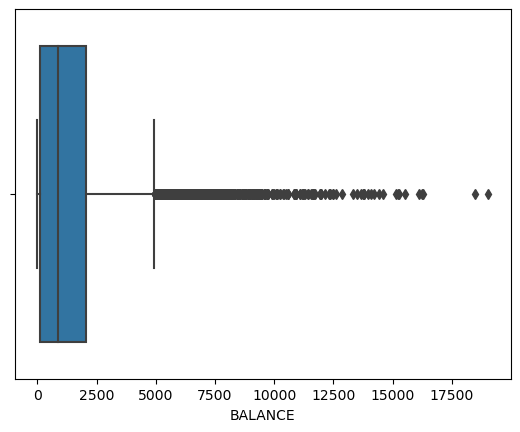

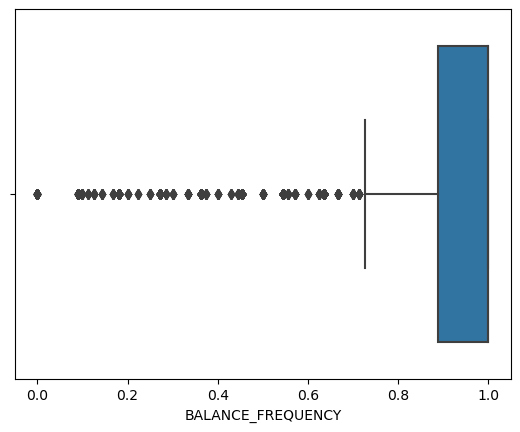

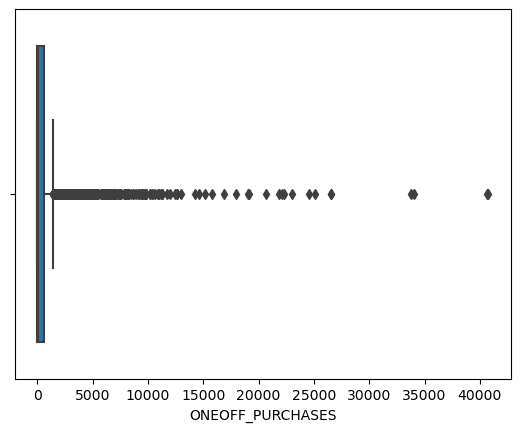

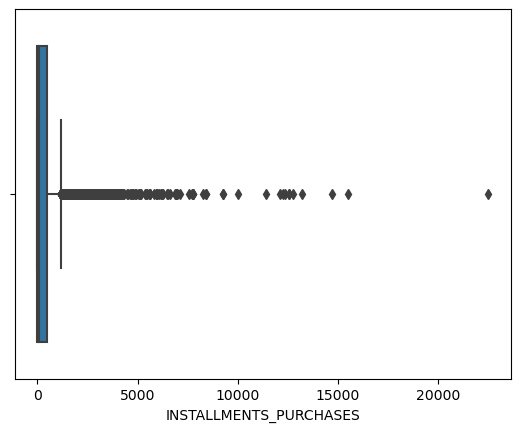

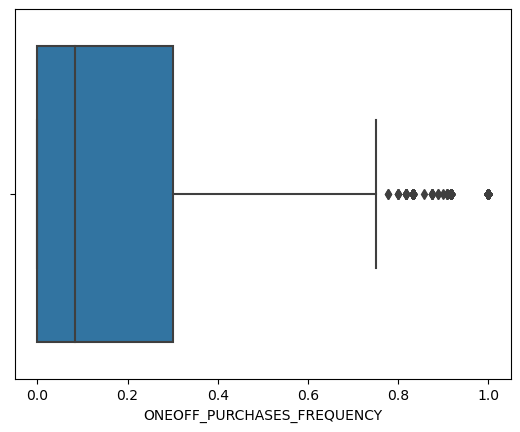

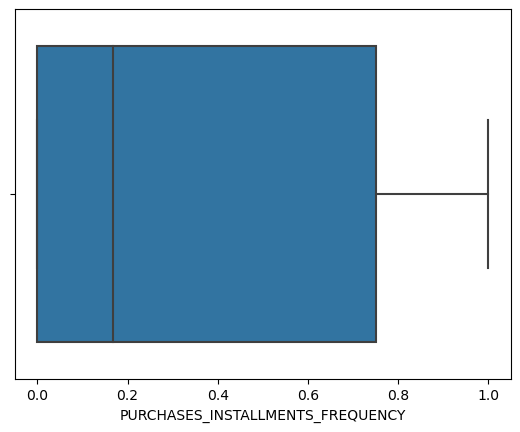

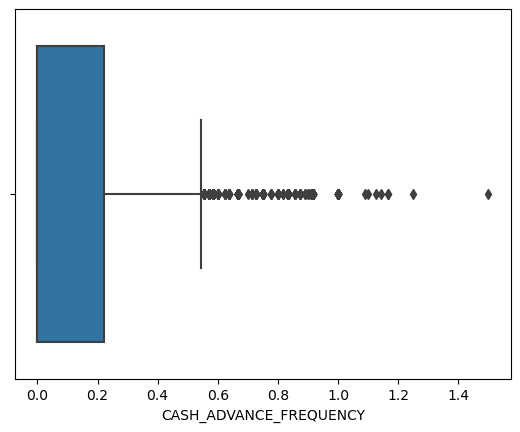

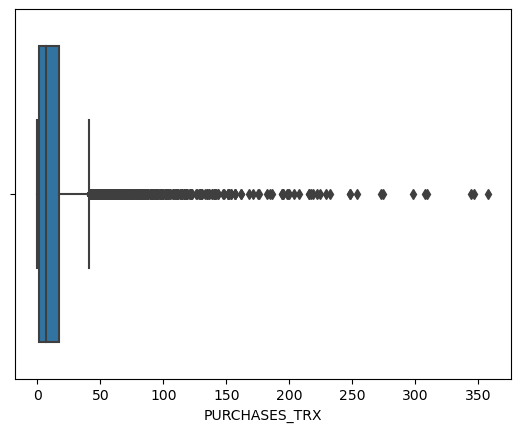

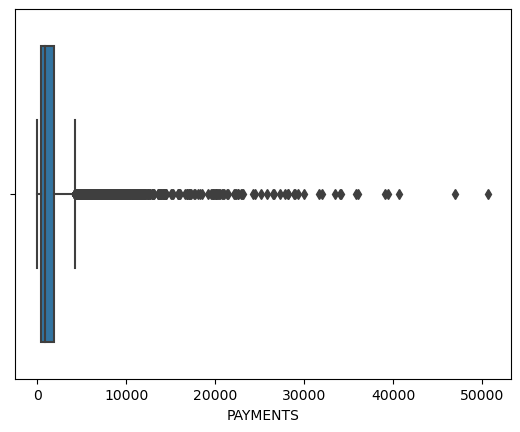

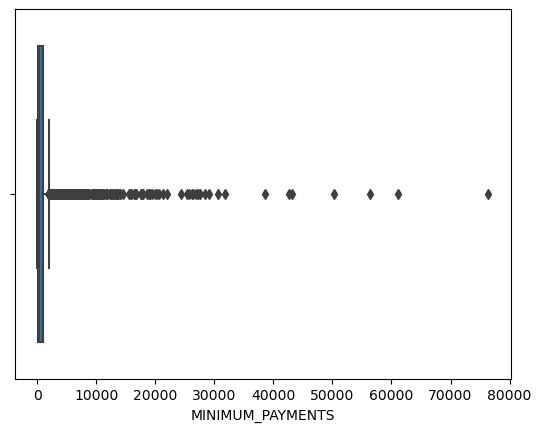

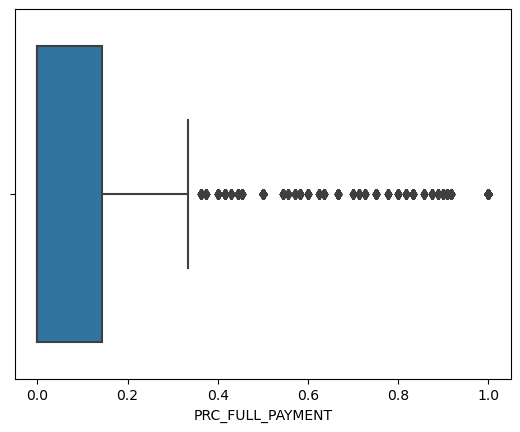

In [18]:
for i in data[['BALANCE', 'BALANCE_FREQUENCY','ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES','ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [19]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1
upper=q3+IQR*1.5
lower=q1-IQR*1.5

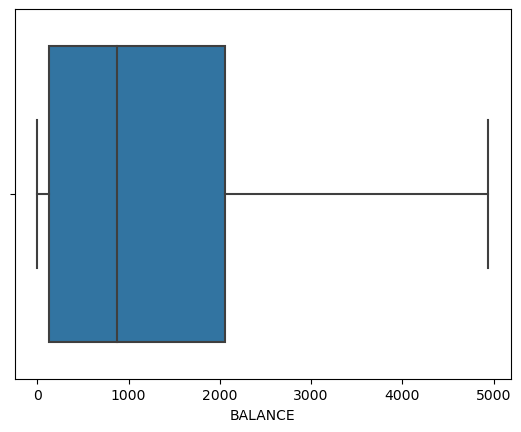

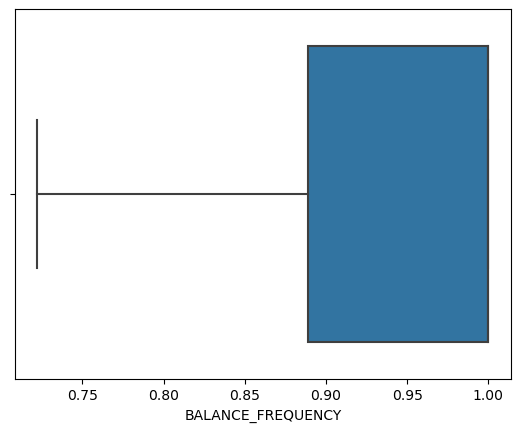

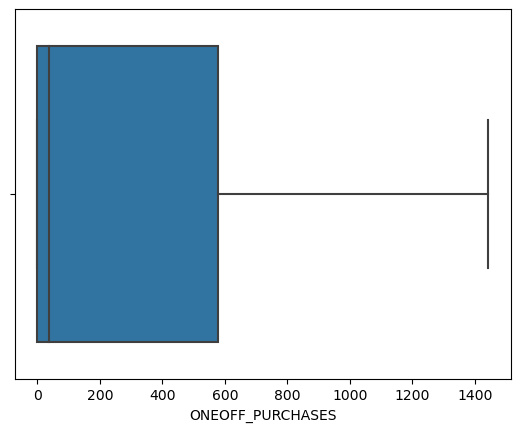

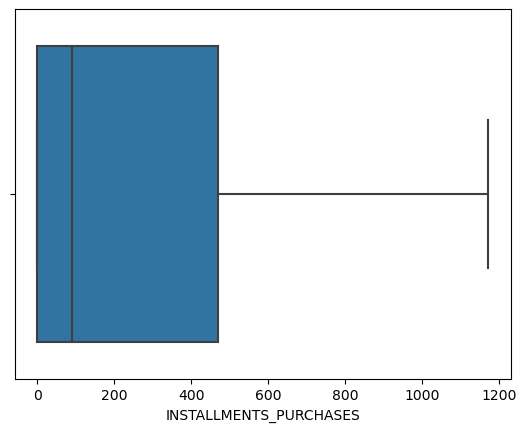

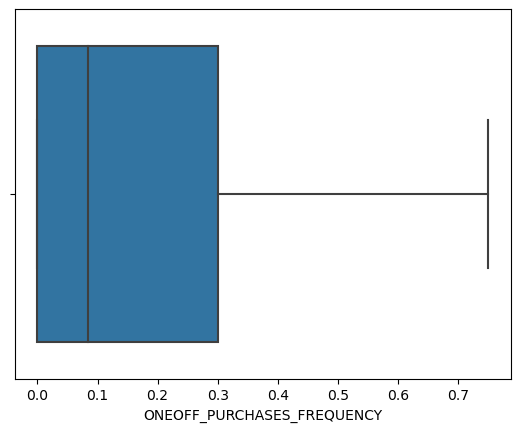

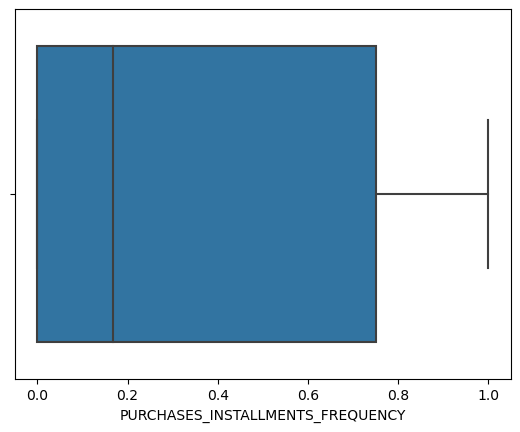

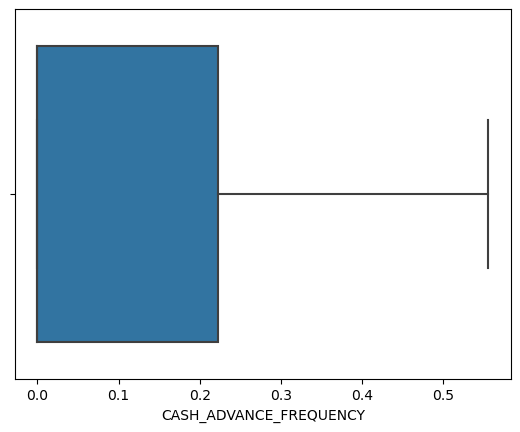

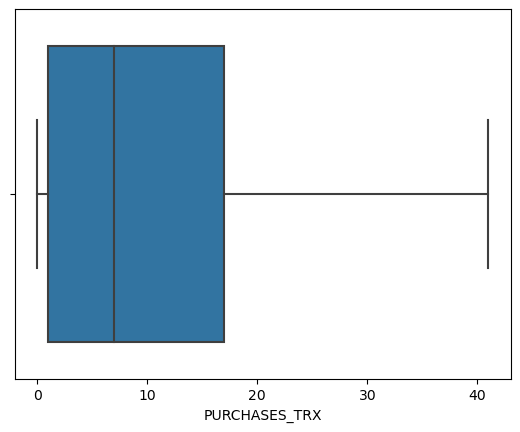

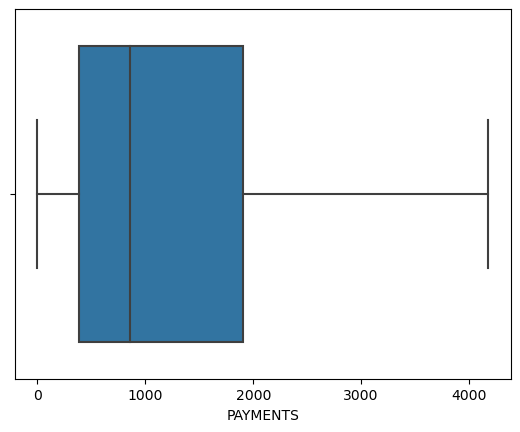

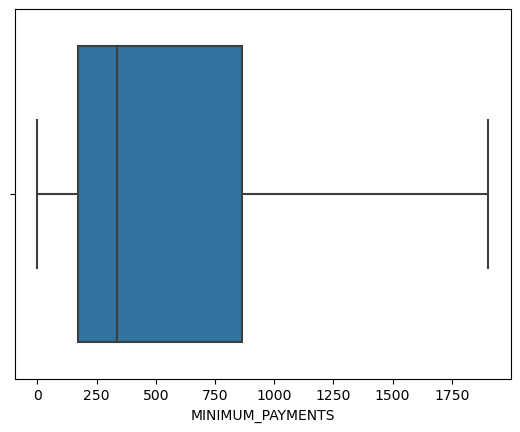

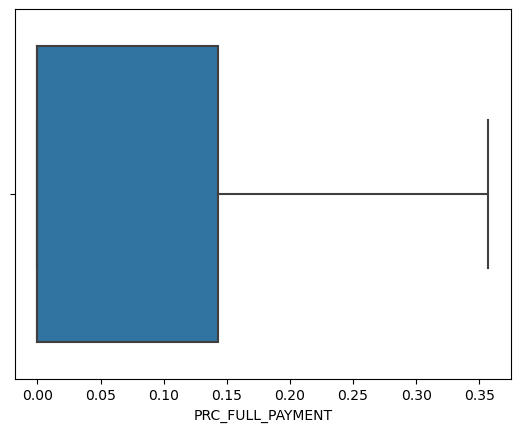

In [20]:
for i in data[['BALANCE', 'BALANCE_FREQUENCY','ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES','ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']]:
    data[i]=np.where(data[i]>upper[i],upper[i],data[i])
    data[i]=np.where(data[i]<lower[i],lower[i],data[i])
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [21]:
target=data['dependent_value']
inputs=data.drop('dependent_value',axis=1)

In [82]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [83]:
inputs_sca=scaler.transform(inputs)
inputs_sca

array([[-0.87782104, -1.02187519, -0.69238338, ..., -0.89985891,
        -0.79404745, -0.62927738],
       [ 1.1785459 , -0.2027079 , -0.69238338, ...,  2.16537463,
         0.83675109,  0.9739614 ],
       [ 0.71848713,  0.61645939,  0.81832005, ..., -0.56965301,
         0.05869355, -0.62927738],
       ...,
       [-0.88920486, -0.88535181, -0.69238338, ..., -0.9945615 ,
        -0.89385616,  1.17436805],
       [-0.89567082, -0.88535181, -0.69238338, ..., -1.01712771,
        -0.94046866,  1.17436805],
       [-0.66200474, -1.88655177,  1.44372708, ..., -1.00878706,
        -0.88359305, -0.62927738]])

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(inputs_sca,target,test_size=0.3,random_state=42)

In [85]:
from sklearn import metrics
def evaluate(model,x_test,y_test):
    y_pred=model.predict(x_test)
    confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
    report=metrics.classification_report(y_test,y_pred)
    acc=metrics.accuracy_score(y_test,y_pred)
    print(confusion_matrix)
    print(acc)
    print(report)

In [86]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.linear_model import LogisticRegression

In [37]:
base_classifiers = [
    RandomForestClassifier(),
    LGBMClassifier()
]

In [38]:
meta_classifier = LogisticRegression()

In [39]:
stacking_classifier = StackingCVClassifier(classifiers=base_classifiers,
                                           meta_classifier=meta_classifier,
                                           cv=5,
                                           use_probas=True,
                                           use_features_in_secondary=True,
                                           verbose=1,
                                           random_state=42)

In [40]:
stacking_classifier.fit(X_train, y_train)

Fitting 2 classifiers...
Fitting classifier1: randomforestclassifier (1/2)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier2: lgbmclassifier (2/2)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.9s finished
C:\Users\99451\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingCVClassifier(classifiers=[RandomForestClassifier(), LGBMClassifier()],
                     cv=5, meta_classifier=LogisticRegression(),
                     random_state=42, use_features_in_secondary=True,
                     use_probas=True, verbose=1)

In [44]:
result_stacking = evaluate(stacking_classifier, X_test, y_test)

[[483 173  36]
 [139 842  77]
 [ 20  57 858]]
0.8130353817504655
              precision    recall  f1-score   support

           0       0.75      0.70      0.72       692
           1       0.79      0.80      0.79      1058
           2       0.88      0.92      0.90       935

    accuracy                           0.81      2685
   macro avg       0.81      0.80      0.81      2685
weighted avg       0.81      0.81      0.81      2685



In [45]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [46]:
base_classifiers = [
    RandomForestClassifier(),
    XGBClassifier()
]

In [47]:
meta_classifier = LogisticRegression()

In [49]:
stacking_classifier_1 = StackingCVClassifier(classifiers=base_classifiers,
                                           meta_classifier=meta_classifier,
                                           cv=5,
                                           use_probas=True,
                                           use_features_in_secondary=True,
                                           verbose=1,
                                           random_state=42)

In [50]:
stacking_classifier_1.fit(X_train, y_train)

Fitting 2 classifiers...
Fitting classifier1: randomforestclassifier (1/2)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier2: xgbclassifier (2/2)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.9s finished
C:\Users\99451\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingCVClassifier(classifiers=[RandomForestClassifier(),
                                  XGBClassifier(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=None,
                                                gpu_id=None, grow_policy=None,
                                                importance_type=None,
                                                interaction_const...
                                                max_cat_threshold=Non

In [51]:
result_stacking = evaluate(stacking_classifier_1, X_test, y_test)

[[485 169  38]
 [146 837  75]
 [ 23  59 853]]
0.8100558659217877
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       692
           1       0.79      0.79      0.79      1058
           2       0.88      0.91      0.90       935

    accuracy                           0.81      2685
   macro avg       0.80      0.80      0.80      2685
weighted avg       0.81      0.81      0.81      2685



In [52]:
base_classifiers = [
    RandomForestClassifier(),
    CatBoostClassifier() 
]

In [53]:
meta_classifier = LogisticRegression()

In [54]:
stacking_classifier_2 = StackingCVClassifier(classifiers=base_classifiers,
                                           meta_classifier=meta_classifier,
                                           cv=5,
                                           use_probas=True,
                                           use_features_in_secondary=True,
                                           verbose=1,
                                           random_state=42)
stacking_classifier_2.fit(X_train, y_train)

Fitting 2 classifiers...
Fitting classifier1: randomforestclassifier (1/2)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier2: catboostclassifier (2/2)
Learning rate set to 0.085906
0:	learn: 1.0269199	total: 165ms	remaining: 2m 44s
1:	learn: 0.9660277	total: 179ms	remaining: 1m 29s
2:	learn: 0.9116321	total: 191ms	remaining: 1m 3s
3:	learn: 0.8691340	total: 206ms	remaining: 51.3s
4:	learn: 0.8344221	total: 219ms	remaining: 43.7s
5:	learn: 0.8037807	total: 238ms	remaining: 39.4s
6:	learn: 0.7711923	total: 250ms	remaining: 35.5s
7:	learn: 0.7441898	total: 263ms	remaining: 32.6s
8:	learn: 0.7226234	total: 276ms	remaining: 30.4s
9:	learn: 0.6984294	total: 289ms	remaining: 28.6s
10:	learn: 0.6801664	total: 301ms	remaining: 27.1s
11:	learn: 0.6626395	total: 314ms	remaining: 25.8s
12:	learn: 0.6468738	total: 326ms	remaining: 24.7s
13:	learn: 0.6334363	total: 338ms	remaining: 23.8s
14:	learn: 0.6211646	total: 351ms	remaining: 23.1s
15:	learn: 0.6078050	total: 364ms	remaining: 22.4s
16:	learn: 0.5970716	total: 385ms	remaining: 22.3s
17:	learn: 0.5859760	total: 398ms	remaining: 21.7s
18:	learn: 0.5

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min finished


Learning rate set to 0.086889
0:	learn: 1.0267213	total: 32.2ms	remaining: 32.2s
1:	learn: 0.9651903	total: 65.6ms	remaining: 32.7s
2:	learn: 0.9112069	total: 91.6ms	remaining: 30.4s
3:	learn: 0.8665774	total: 122ms	remaining: 30.4s
4:	learn: 0.8280386	total: 152ms	remaining: 30.3s
5:	learn: 0.7947326	total: 179ms	remaining: 29.6s
6:	learn: 0.7649659	total: 210ms	remaining: 29.9s
7:	learn: 0.7395265	total: 235ms	remaining: 29.2s
8:	learn: 0.7142080	total: 266ms	remaining: 29.3s
9:	learn: 0.6913448	total: 294ms	remaining: 29.1s
10:	learn: 0.6724352	total: 325ms	remaining: 29.2s
11:	learn: 0.6541990	total: 355ms	remaining: 29.3s
12:	learn: 0.6391041	total: 379ms	remaining: 28.8s
13:	learn: 0.6253465	total: 405ms	remaining: 28.5s
14:	learn: 0.6103634	total: 436ms	remaining: 28.6s
15:	learn: 0.5980337	total: 459ms	remaining: 28.2s
16:	learn: 0.5874062	total: 480ms	remaining: 27.8s
17:	learn: 0.5772436	total: 501ms	remaining: 27.4s
18:	learn: 0.5676867	total: 526ms	remaining: 27.2s
19:	lear

C:\Users\99451\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingCVClassifier(classifiers=[RandomForestClassifier(),
                     cv=5, meta_classifier=LogisticRegression(),
                     random_state=42, use_features_in_secondary=True,
                     use_probas=True, verbose=1)

In [55]:
result_stacking = evaluate(stacking_classifier_2, X_test, y_test)

[[488 169  35]
 [145 835  78]
 [ 20  61 854]]
0.8108007448789571
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       692
           1       0.78      0.79      0.79      1058
           2       0.88      0.91      0.90       935

    accuracy                           0.81      2685
   macro avg       0.80      0.80      0.80      2685
weighted avg       0.81      0.81      0.81      2685



In [87]:
base_classifiers = [
    LogisticRegression(),
    CatBoostClassifier() 
]

In [88]:
meta_classifier = RandomForestClassifier()

In [89]:
stacking_classifier_3 = StackingCVClassifier(classifiers=base_classifiers,
                                           meta_classifier=meta_classifier,
                                           cv=5,
                                           use_probas=True,
                                           use_features_in_secondary=True,
                                           verbose=1,
                                           random_state=42)
stacking_classifier_3.fit(X_train, y_train)

Fitting 2 classifiers...
Fitting classifier1: logisticregression (1/2)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier2: catboostclassifier (2/2)
Learning rate set to 0.085906
0:	learn: 1.0269199	total: 12.6ms	remaining: 12.6s
1:	learn: 0.9660277	total: 24ms	remaining: 12s
2:	learn: 0.9116321	total: 35.8ms	remaining: 11.9s
3:	learn: 0.8691340	total: 47.1ms	remaining: 11.7s
4:	learn: 0.8344221	total: 59ms	remaining: 11.7s
5:	learn: 0.8037807	total: 70.6ms	remaining: 11.7s
6:	learn: 0.7711923	total: 93.5ms	remaining: 13.3s
7:	learn: 0.7441898	total: 112ms	remaining: 13.9s
8:	learn: 0.7226234	total: 142ms	remaining: 15.6s
9:	learn: 0.6984294	total: 155ms	remaining: 15.4s
10:	learn: 0.6801664	total: 169ms	remaining: 15.2s
11:	learn: 0.6626395	total: 183ms	remaining: 15s
12:	learn: 0.6468738	total: 194ms	remaining: 14.8s
13:	learn: 0.6334363	total: 206ms	remaining: 14.5s
14:	learn: 0.6211646	total: 217ms	remaining: 14.3s
15:	learn: 0.6078050	total: 229ms	remaining: 14.1s
16:	learn: 0.5970716	total: 241ms	remaining: 13.9s
17:	learn: 0.5859760	total: 253ms	remaining: 13.8s
18:	learn: 0.5750

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.4min finished


Learning rate set to 0.086889
0:	learn: 1.0267213	total: 12.6ms	remaining: 12.6s
1:	learn: 0.9651903	total: 24.5ms	remaining: 12.2s
2:	learn: 0.9112069	total: 36.5ms	remaining: 12.1s
3:	learn: 0.8665774	total: 49.1ms	remaining: 12.2s
4:	learn: 0.8280386	total: 61.3ms	remaining: 12.2s
5:	learn: 0.7947326	total: 73.1ms	remaining: 12.1s
6:	learn: 0.7649659	total: 85.2ms	remaining: 12.1s
7:	learn: 0.7395265	total: 97.2ms	remaining: 12s
8:	learn: 0.7142080	total: 109ms	remaining: 12s
9:	learn: 0.6913448	total: 121ms	remaining: 12s
10:	learn: 0.6724352	total: 133ms	remaining: 12s
11:	learn: 0.6541990	total: 146ms	remaining: 12s
12:	learn: 0.6391041	total: 158ms	remaining: 12s
13:	learn: 0.6253465	total: 170ms	remaining: 12s
14:	learn: 0.6103634	total: 182ms	remaining: 12s
15:	learn: 0.5980337	total: 195ms	remaining: 12s
16:	learn: 0.5874062	total: 208ms	remaining: 12s
17:	learn: 0.5772436	total: 223ms	remaining: 12.2s
18:	learn: 0.5676867	total: 236ms	remaining: 12.2s
19:	learn: 0.5567980	to

StackingCVClassifier(classifiers=[LogisticRegression(),
                     cv=5, meta_classifier=RandomForestClassifier(),
                     random_state=42, use_features_in_secondary=True,
                     use_probas=True, verbose=1)

In [90]:
result_stacking = evaluate(stacking_classifier_3, X_test, y_test)

[[513 153  26]
 [157 826  75]
 [ 31  53 851]]
0.8156424581005587
              precision    recall  f1-score   support

           0       0.73      0.74      0.74       692
           1       0.80      0.78      0.79      1058
           2       0.89      0.91      0.90       935

    accuracy                           0.82      2685
   macro avg       0.81      0.81      0.81      2685
weighted avg       0.82      0.82      0.82      2685



In [93]:
base_classifiers = [
    LogisticRegression(),
    XGBClassifier() 
]

In [94]:
meta_classifier = RandomForestClassifier()


In [95]:
stacking_classifier_4 = StackingCVClassifier(classifiers=base_classifiers,
                                           meta_classifier=meta_classifier,
                                           cv=5,
                                           use_probas=True,
                                           use_features_in_secondary=True,
                                           verbose=1,
                                           random_state=42)
stacking_classifier_4.fit(X_train, y_train)

Fitting 2 classifiers...
Fitting classifier1: logisticregression (1/2)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier2: xgbclassifier (2/2)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.9s finished


StackingCVClassifier(classifiers=[LogisticRegression(),
                                  XGBClassifier(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=None,
                                                gpu_id=None, grow_policy=None,
                                                importance_type=None,
                                                interaction_constrain...
                                                max_cat_threshold=Non

In [96]:
result_stacking = evaluate(stacking_classifier_4, X_test, y_test)

[[507 151  34]
 [166 812  80]
 [ 29  46 860]]
0.8115456238361266
              precision    recall  f1-score   support

           0       0.72      0.73      0.73       692
           1       0.80      0.77      0.79      1058
           2       0.88      0.92      0.90       935

    accuracy                           0.81      2685
   macro avg       0.80      0.81      0.80      2685
weighted avg       0.81      0.81      0.81      2685



In [97]:
base_classifiers = [
    LogisticRegression(),
    LGBMClassifier() 
]

In [98]:
meta_classifier = RandomForestClassifier()

In [99]:
stacking_classifier_5 = StackingCVClassifier(classifiers=base_classifiers,
                                           meta_classifier=meta_classifier,
                                           cv=5,
                                           use_probas=True,
                                           use_features_in_secondary=True,
                                           verbose=1,
                                           random_state=42)
stacking_classifier_5.fit(X_train, y_train)

Fitting 2 classifiers...
Fitting classifier1: logisticregression (1/2)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier2: lgbmclassifier (2/2)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.5s finished


StackingCVClassifier(classifiers=[LogisticRegression(), LGBMClassifier()], cv=5,
                     meta_classifier=RandomForestClassifier(), random_state=42,
                     use_features_in_secondary=True, use_probas=True,
                     verbose=1)

In [100]:
result_stacking = evaluate(stacking_classifier_5, X_test, y_test)

[[515 150  27]
 [155 824  79]
 [ 19  54 862]]
0.8197392923649907
              precision    recall  f1-score   support

           0       0.75      0.74      0.75       692
           1       0.80      0.78      0.79      1058
           2       0.89      0.92      0.91       935

    accuracy                           0.82      2685
   macro avg       0.81      0.81      0.81      2685
weighted avg       0.82      0.82      0.82      2685



In [101]:
from sklearn.svm import SVC

In [106]:
base_classifiers = [
    LogisticRegression(),
    SVC(probability=True) 
]

In [107]:
meta_classifier = RandomForestClassifier()

In [108]:
stacking_classifier_6 = StackingCVClassifier(classifiers=base_classifiers,
                                           meta_classifier=meta_classifier,
                                           cv=5,
                                           use_probas=True,
                                           use_features_in_secondary=True,
                                           verbose=1,
                                           random_state=42)
stacking_classifier_6.fit(X_train, y_train)

Fitting 2 classifiers...
Fitting classifier1: logisticregression (1/2)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier2: svc (2/2)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   51.0s finished


StackingCVClassifier(classifiers=[LogisticRegression(), SVC(probability=True)],
                     cv=5, meta_classifier=RandomForestClassifier(),
                     random_state=42, use_features_in_secondary=True,
                     use_probas=True, verbose=1)

In [109]:
result_stacking = evaluate(stacking_classifier_6, X_test, y_test)

[[502 157  33]
 [144 831  83]
 [ 32  44 859]]
0.8163873370577281
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       692
           1       0.81      0.79      0.80      1058
           2       0.88      0.92      0.90       935

    accuracy                           0.82      2685
   macro avg       0.81      0.81      0.81      2685
weighted avg       0.81      0.82      0.82      2685



In [110]:
base_classifiers = [
    RandomForestClassifier(),
    SVC(probability=True) 
]

In [111]:
meta_classifier = LogisticRegression()

In [112]:
stacking_classifier_7 = StackingCVClassifier(classifiers=base_classifiers,
                                           meta_classifier=meta_classifier,
                                           cv=5,
                                           use_probas=True,
                                           use_features_in_secondary=True,
                                           verbose=1,
                                           random_state=42)
stacking_classifier_7.fit(X_train, y_train)

Fitting 2 classifiers...
Fitting classifier1: randomforestclassifier (1/2)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier2: svc (2/2)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   53.9s finished
C:\Users\99451\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingCVClassifier(classifiers=[RandomForestClassifier(),
                                  SVC(probability=True)],
                     cv=5, meta_classifier=LogisticRegression(),
                     random_state=42, use_features_in_secondary=True,
                     use_probas=True, verbose=1)

In [113]:
result_stacking = evaluate(stacking_classifier_7, X_test, y_test)

[[471 180  41]
 [140 843  75]
 [ 21  73 841]]
0.8026070763500931
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       692
           1       0.77      0.80      0.78      1058
           2       0.88      0.90      0.89       935

    accuracy                           0.80      2685
   macro avg       0.80      0.79      0.79      2685
weighted avg       0.80      0.80      0.80      2685

